# Week 3: Some Fourier Series| Seasons of Code - AnimAI Project

Welcome to **Week 3** of the **Seasons of Code (SoC) - AnimAI** project!

### Brief Overview of What We Are Going to Do in This Exercise

In this exercise for `Week-03`, we will build upon some fundamental concepts in **Signal Processing**. These ideas are not only foundational but also highly intuitive—especially useful in fields like **animation** and **machine learning**, where signal representation plays a key role.

The first major concept we will explore is the **Fourier Series**. It allows us to express any **periodic function** $f(t)$ as a **sum of sinusoids** (sines and cosines) of various frequencies, each with appropriate amplitudes. This concept is powerful, it tells us that even complex periodic signals can be reconstructed from simple oscillatory functions. For explanation, please refer this wonderful video by **3b1b**: *[But What is a Fourier Series? - Youtube](https://www.youtube.com/watch?v=r6sGWTCMz2k&t=1109s)*

### General Fourier Series Representation

Any periodic function $f(t)$ with period $T$ can be represented as:

$$
f(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos(n\omega_0 t) + b_n \sin(n\omega_0 t) \right]
$$

where the **fundamental angular frequency** is:

$$
\omega_0 = \frac{2\pi}{T}
$$

The **Fourier coefficients** are given by:

* Constant (DC) term:

  $$
  a_0 = \frac{1}{T} \int_{-T/2}^{T/2} f(t) \, dt
  $$

* Cosine (even) coefficients:

  $$
  a_n = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos(n\omega_0 t) \, dt
  $$

* Sine (odd) coefficients:

  $$
  b_n = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin(n\omega_0 t) \, dt
  $$

### Example: Fourier Series of a Square Wave

Consider a square wave $f(t)$ of period $T = 1\,\text{ms}$ (i.e., frequency = 1 kHz), defined as:

$$
f(t) =
\begin{cases}
1, & -\frac{T}{2} < t < 0 \\
-1, & 0 < t < \frac{T}{2}
\end{cases}
\quad \text{and} \quad f(t+T) = f(t)
$$

This square wave is **odd**, so all $a_n = 0$ and $a_0 = 0$.

We compute the sine coefficients $b_n$ as:

$$
b_n = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin(n\omega_0 t) \, dt
$$

Since $f(t)$ is odd and sine is also odd, the product is **even**, allowing simplification:

$$
b_n = \frac{4}{T} \int_{0}^{T/2} f(t) \sin(n\omega_0 t) \, dt = \frac{4}{T} \int_{0}^{T/2} (-1) \sin(n\omega_0 t) \, dt
$$

Evaluating this gives:

$$
b_n =
\begin{cases}
\displaystyle \frac{4}{n\pi}, & \text{for odd } n \\
0, & \text{for even } n
\end{cases}
$$

Hence, the Fourier series becomes:

$$
f(t) = \frac{4}{\pi} \sum_{n=1,3,5,\dots}^{\infty} \frac{1}{n} \sin(2\pi n \cdot 1000 \cdot t)
$$

### Conclusion

This shows that even a discontinuous, piecewise function like a **square wave** can be expressed as a sum of **continuous sinusoidal functions**. This is the beauty of the Fourier Series—it bridges the gap between the time-domain structure and frequency-domain intuition. Through such representations, we can analyze, manipulate, and synthesize complex signals in a mathematically elegant way.

Let’s now visualize and simulate this using code and animations!
> The same illustration is on this link: [Square Wave Fourier Series - Youtube Shorts](https://youtube.com/shorts/tU9MNV6r440?si=SFFLTYnm7URF17RM)
> But please go through the below code snippet which tries to do the same

In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider # This allows for interactive widgets in Jupyter Notebooks,
# with this you can adjust the number of terms in the Fourier series approximation.
# You can ignore this for now.

# Definition of the square wave function f(t, T), here T is the period.
def square_wave(t, T):
    return np.where((t % T) < T / 2, 1, -1)

# For computing the Fourier series approximation (only odd harmonics)
def fourier_series_square_wave(t, T, n_terms):
    f_approx = np.zeros_like(t)
    for n in range(1, n_terms + 1, 2):  # Only odd terms
        b_n = 4 / (n * np.pi)  # Fourier coefficient
        f_approx += b_n * np.sin(2 * np.pi * n * t / T)
    return f_approx

# Plotting the original square wave and its Fourier approximation
def plot_fourier_series(n_terms):
    T = 1e-3  # Period = 1 ms
    t = np.linspace(-2 * T, 2 * T, 1000)  # Time vector around 2 cycles
    f_square = square_wave(t, T)  # Actual square wave f(t, T)
    f_approx = fourier_series_square_wave(t, T, n_terms)  # Approximation

    plt.figure(figsize=(10, 6))
    plt.plot(t * 1e3, f_square, label="Square Wave", color="black", linewidth=2)
    plt.plot(t * 1e3, f_approx, label=f"Fourier Approximation\n({n_terms} terms)", color="red", linestyle="--")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude")
    plt.title("Fourier Series Approximation of a Square Wave (T = 1 ms)")
    plt.legend()
    plt.grid(True)
    plt.ylim(-1.5, 1.5)
    plt.show()

interact(plot_fourier_series, n_terms=IntSlider(min=1, max=500, step=1, value=4, description="Number of Terms"))


interactive(children=(IntSlider(value=4, description='Number of Terms', max=500, min=1), Output()), _dom_class…

<function __main__.plot_fourier_series(n_terms)>

In your first year, during MA110, you studied the Laplace Transform:

$$
\mathcal{L}\{f(t)\} = \int_{0}^{\infty} f(t) e^{-st} \, dt
$$

You mostly used this to solve differential equations, it helped convert calculus problems into algebraic ones. You treated it like a tool, or a formula, to make solving ODEs easier. But there’s a deeper idea hiding inside it.
You first had a differential equation, like:
$$  \frac{d^2y}{dt^2} + 3\frac{dy}{dt} + 2y = 0
$$  and say the initial conditions were \(y(0) = 0\) and \(\frac{dy}{dt}(0) = 0\).
Then you transformed it using Laplace, which turned it into an algebraic equation in terms of \(s\):
$$
Y(s) = \frac{1}{s^2 + 3s + 2}
$$

You then did partial fraction decomposition, found the roots, and got back to the time domain with inverse Laplace:
$$
Y(s) = \frac{1}{s^2 + 3s + 2} = \frac{1}{(s+1)(s+2)} = \frac{A}{s+1} + \frac{B}{s+2}, \quad \text{where } A = 1, B = -1
$$

$$
y(t) = \mathcal{L}^{-1}\{Y(s)\} = e^{-t} - e^{-2t}
$$
This was a powerful technique, but it was focused on solving equations, not understanding signals.
Now, let’s think about what Laplace really does. It checks how well a function matches decaying exponentials \(e^{-st}\). It’s like asking, “How much of this function looks like a decaying wave?”
This is useful for solving ODEs, but it’s not the whole story. What if we want to analyze signals that aren’t just decaying? What if we want to understand all kinds of frequencies, not just those that decay over time?
So, What Is the Fourier Transform?
Now imagine we’re not just solving equations. We're trying to understand signals: sound, motion, animation, sensor data, or anything that changes with time.

Instead of just checking how a signal matches decaying exponentials (Laplace), what if we ask:

“How much of this signal is made up of pure waves, like sinusoids of different frequencies?”

That’s exactly what the Fourier Transform does.

The Key Difference:

| Transform | Integral limits | Input signal | Used for |
|-----------|-----------------|--------------|----------|
| Laplace   | 0 → ∞           | Causal signals (start at t = 0) | Solving ODEs |
| Fourier   | −∞ → ∞          | Any signal (past + future), $f(t)$ defined for all $t \in \mathbb{R}$ | Understanding frequency content |

Fourier Transform:

$$
\mathcal{F}\{f(t)\} = F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} \, dt
$$

Please watch this video for a visual explanation: [But what is Fourier Transform? - 3Blue1Brown Youtube](https://www.youtube.com/watch?v=spUNpyF58BY&t=513s).

What Does the Fourier Transform Tell Us?
It tells us how much of each frequency is present in your signal.

- Is your motion mostly slow and smooth? → low frequency
- Is it jerky and vibrating? → high frequency
- Is it made up of repeating cycles? → clear peaks at specific frequencies

It’s like a prism for signals, just like a prism breaks white light into colors, Fourier Transform breaks a signal into frequencies.


### Why Is This Important for Animation?
In animation, everything is a signal:

- The position of a character’s hand over time
- The bounce of a ball
- The facial expression changing across frames
- Even the color variation in a shader

These are all functions of time (or space), and Fourier helps us understand and manipulate them.

Some Use Cases:
- Filtering: Remove noise or unwanted fast vibrations
- Compression: Keep only major frequency components to store less data
- Synthesis: Generate procedural motions like idle animations
- Machine Learning Features: Use frequency info as features for ML models in animation or motion prediction

So Why Did We Learn Fourier Series?
Fourier Series came first because it's simpler:

- It only works for periodic signals
- It says: any repeating signal can be written as a sum of sinusoids

But real-world signals aren’t always periodic. So we extended this idea to non-periodic signals, that’s how we got the Fourier Transform.

- Fourier Series → breaks down repeating periodic signals
- Fourier Transform → breaks down any signal

Final Intuition:
Laplace helped us solve equations.

Fourier helps us understand and build signals.

And in animation, signals = motion, color, sound, emotion.

That’s why signal processing and Fourier analysis are powerful tools for creative coding, animation, and machine learning.


###  Motion Capture/Detection Techniques

---

#### 1. **Sensor-Based**
- Uses IMUs, accelerometers, and gyroscopes  
- Sensors attached directly to the body or object  
- Measures orientation, acceleration, and magnetic fields  

---

#### 2. **Marker-Based**
- Uses reflective markers tracked by infrared cameras  
- Requires high-precision systems like Vicon or OptiTrack  
- Enables accurate optical tracking  

---

#### 3. **Vision-Based (Computer Vision)**
- Uses only RGB or depth cameras  
- Employs deep learning for feature and pose detection  
- No physical markers or sensors required  

---



In [3]:
# Uninstall any existing mediapipe installations to ensure a clean state.
!pip uninstall -y mediapipe
# Install the specific version of mediapipe known to work.
!pip install mediapipe==0.10.9

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks] # Corrected variable name
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    # We need to import cv2 here or earlier if not already imported for cv2.putText
    import cv2
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image


Found existing installation: mediapipe 0.10.9
Uninstalling mediapipe-0.10.9:
  Successfully uninstalled mediapipe-0.10.9
  Using cached mediapipe-0.10.9-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
Using cached mediapipe-0.10.9-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)


In [5]:
  !wget -q -O hand_landmarker.task -P /content/ https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task


### Comparison Table

| Technique            | Accuracy | Cost  | Setup Complexity | Environment Flexibility |
|----------------------|----------|-------|-------------------|--------------------------|
| Sensor-Based         | Medium   | Medium| High              | Excellent                |
| Marker-Based         | High     | High  | Very High         | Poor                     |
| Vision-Based (CV)    | Medium   | Low   | Low               | Moderate                 |


#  Hand Landmark Detection: Nodes Identification

## How MediaPipe Detects Hand Landmarks (Nodes)


### Palm Detection

- Uses a **Single-Shot Detector (SSD)** to locate the palm region.
- Focuses on the palm since it has a more **consistent and square shape** compared to fingers.
- **Output:** Bounding box surrounding the detected hand.

---

###  Hand Landmark Localization

- A **regression model** predicts the positions of **21 3D keypoints** within the detected palm region.
- It performs **coordinate regression** to predict:
  - Normalized coordinates (range: `0.0` to `1.0`)
  - x, y (2D image plane), z (depth)

- **Output:** A set of `21 hand landmarks` with (x, y, z) values.
 You can get to know about this in the documentation for more clarity - https://ai.google.dev/edge/mediapipe/solutions/vision/hand_landmarker#models



In [6]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Initialize hand landmark detector
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1  # Only detect one hand
)
detector = vision.HandLandmarker.create_from_options(options)

def draw_nodes_on_image(rgb_image, detection_result):
    """Draw hand landmarks on image"""
    annotated_image = np.copy(rgb_image)

    if not detection_result.hand_landmarks:
        return annotated_image

    # Get first hand's landmarks
    hand_landmarks = detection_result.hand_landmarks[0]

    # Draw each landmark as a circle
    height, width, _ = annotated_image.shape
    for landmark in hand_landmarks:
        x = int(landmark.x * width)
        y = int(landmark.y * height)
        cv2.circle(annotated_image, (x, y), 5, (255, 0, 0), -1)  # red

    # Draw connections between landmarks
    connections = mp.solutions.hands.HAND_CONNECTIONS
    for connection in connections:
        # Access the start and end indices from the tuple elements
        start_idx = connection[0]
        end_idx = connection[1]

        x1 = int(hand_landmarks[start_idx].x * width)
        y1 = int(hand_landmarks[start_idx].y * height)
        x2 = int(hand_landmarks[end_idx].x * width)
        y2 = int(hand_landmarks[end_idx].y * height)

        cv2.line(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return annotated_image

In [7]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)

Saving hand.jpg to hand.jpg
Uploaded file: hand.jpg


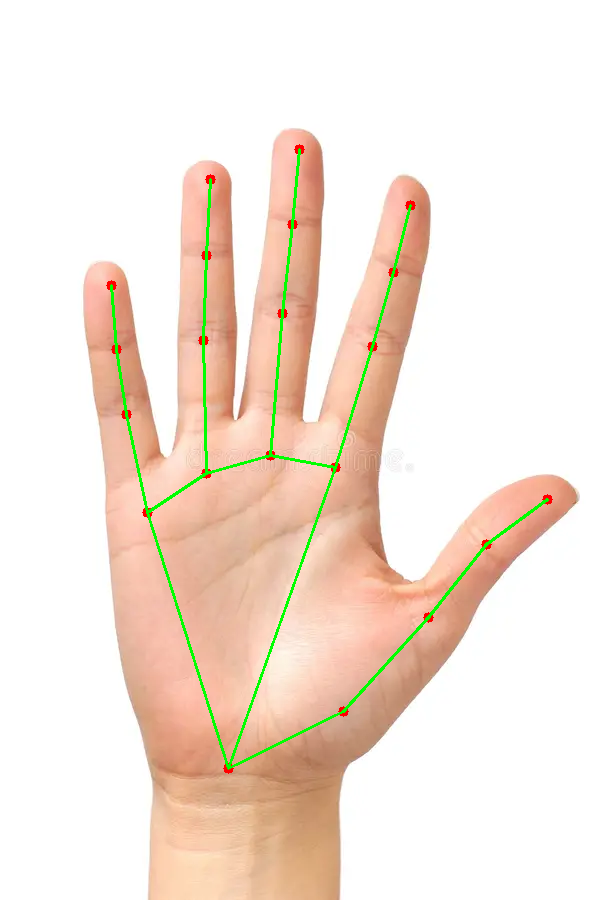

In [8]:
# Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow # Import cv2_imshow


#  Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)

# Load the input image.
image = mp.Image.create_from_file("hand.jpg")

#Detect hand landmarks from the input image.
detection_result = detector.detect(image)

#Process the classification result. In this case, visualize it.
annotated_image = draw_nodes_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

# Why Noise is Often High Frequency

In the real world, signals like motion capture data (used in animation to track a character’s movements) often get messy because of noise. Noise is like static on an old TV—it’s unwanted, random fluctuations that make your signal less clear. So , what do you think it's frequency would be when fourier transform is taken?

Think about it: noise is often rapid, erratic changes. For example, in motion capture, your sensor might pick up tiny shakes from a shaky camera or electrical interference. These shakes happen super fast, which means they’re made of high-frequency components. Smooth motions, like a character waving their hand, change more slowly and are made of low-frequency components.

However, not all high-frequency components are noise! Sometimes, high frequencies are part of the signal you care about. For example, if a character suddenly snaps their fingers in an animation, that quick motion creates high-frequency components that are important to keep. So, we need to be careful when filtering out high frequencies to avoid losing key details.



# Using sensor data
Let’s walk through a practical example to make this clear. Suppose you’re working on an animation project where you’re using motion capture technique by using sensor data to track a dancer’s movements. The dancer’s arm moves smoothly in a wave-like motion, but your data is full of unwanted jitters (noise) because the motion capture sensors aren’t perfect.

Here’s how the Fourier Transform can help clean up the data:





Capture the Signal: Your motion capture system records the position of the dancer’s arm over time. Let’s say it’s the x-coordinate of their hand, which should be smooth but looks jittery because of noise.



Apply the Fourier Transform: Use the Fourier Transform to convert this time-based signal (position vs. time) into the frequency domain. This gives you a spectrum showing how much of each frequency is in the signal.





Smooth arm movements = low frequencies.



Jittery noise = high frequencies.



Filter Out Noise: Identify the high-frequency components (the ones causing the jitters) and set them to zero or reduce their strength. This is like turning down the volume on the cymbal crashes in a song while keeping the bass and vocals.



Inverse Fourier Transform: Convert the filtered frequency spectrum back to the time domain using the Inverse Fourier Transform. This gives you a cleaner signal with the smooth arm motion intact and the noise reduced.



Result: You now have clean motion capture data that accurately represents the dancer’s smooth arm movements, ready to be used in your animation!

Now your task is to use this to detect motion of your hand by using these nodes.

Generating motion data...
Data generation completed in 0.00 seconds
Applying Fourier Transform...
FFT processing completed in 0.00 seconds
Creating visualization...
Plotting completed in 0.19 seconds
Total execution time: 0.19 seconds


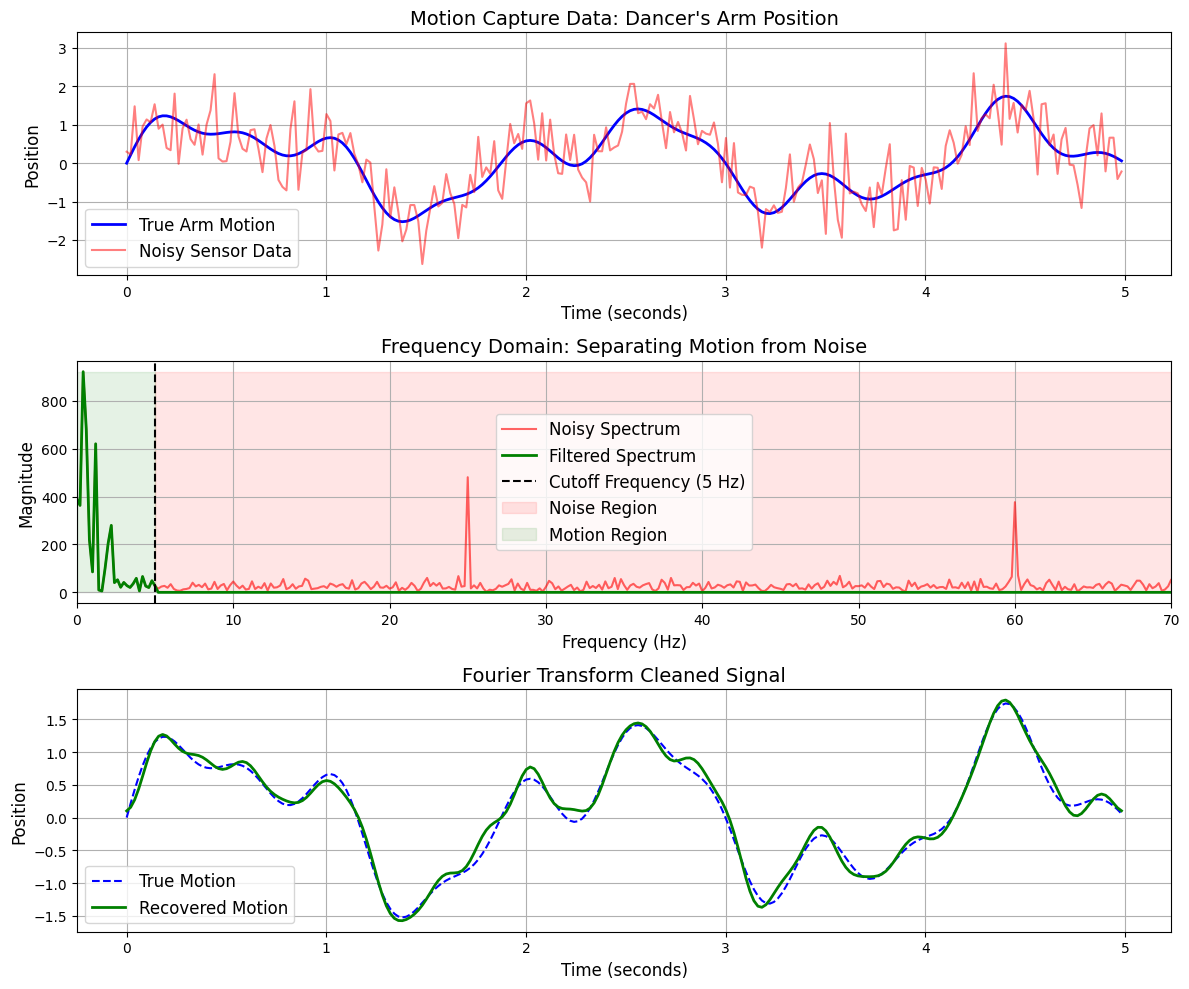

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

print("Generating motion data...")
start_time = time.time()

# Generate smooth arm motion (low frequencies)
duration = 5.0  # seconds
sample_rate = 500  # Hz
t = np.linspace(0, duration, int(duration * sample_rate))

# Smooth dancer's arm motion (combination of slow waves)
smooth_motion = (np.sin(2 * np.pi * 0.5 * t) +  # Primary motion frequency (0.5 Hz)
                 0.5 * np.sin(2 * np.pi * 1.2 * t) +  # Secondary motion (1.2 Hz)
                 0.3 * np.sin(2 * np.pi * 2.1 * t))  # Tertiary motion (2.1 Hz)

# Add high-frequency sensor noise (jitters)
np.random.seed(42)  # For reproducible results
noise = 0.6 * np.random.normal(0, 1, len(t))  # Gaussian noise
high_freq_noise = 0.4 * np.sin(2 * np.pi * 25 * t) + 0.3 * np.sin(2 * np.pi * 60 * t)
noisy_signal = smooth_motion + noise + high_freq_noise

print(f"Data generation completed in {time.time()-start_time:.2f} seconds")
print("Applying Fourier Transform...")
fft_start = time.time()

# Use real FFT for faster computation (since signal is real-valued)
fft_result = np.fft.rfft(noisy_signal)
freqs = np.fft.rfftfreq(len(t), d=1/sample_rate)

# Create noise-reduction filter (keep frequencies below 5 Hz)
filter_threshold = 5.0  # Cutoff frequency in Hz
filter_mask = freqs <= filter_threshold

# Apply filter and inverse transform
clean_fft = fft_result.copy()
clean_fft[~filter_mask] = 0  # Zero out high frequencies
clean_signal = np.fft.irfft(clean_fft, n=len(t))

print(f"FFT processing completed in {time.time()-fft_start:.2f} seconds")
print("Creating visualization...")
plot_start = time.time()

# Downsample for faster plotting - we don't need all 2500 points
plot_step = 10
t_plot = t[::plot_step]
smooth_plot = smooth_motion[::plot_step]
noisy_plot = noisy_signal[::plot_step]
clean_plot = clean_signal[::plot_step]

plt.figure(figsize=(12, 10))

# Time Domain: Original vs Noisy
plt.subplot(3, 1, 1)
plt.plot(t_plot, smooth_plot, 'b', linewidth=2, label='True Arm Motion')
plt.plot(t_plot, noisy_plot, 'r', alpha=0.5, label='Noisy Sensor Data')
plt.title('Motion Capture Data: Dancer\'s Arm Position', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Frequency Domain: Noise Spectrum
plt.subplot(3, 1, 2)
plt.plot(freqs, np.abs(fft_result), 'r', alpha=0.6, label='Noisy Spectrum')
plt.plot(freqs, np.abs(clean_fft), 'g', linewidth=2, label='Filtered Spectrum')
plt.axvline(filter_threshold, color='k', linestyle='--', label='Cutoff Frequency (5 Hz)')
plt.fill_betweenx([0, np.abs(fft_result).max()], filter_threshold, freqs.max(),
                 color='red', alpha=0.1, label='Noise Region')
plt.fill_betweenx([0, np.abs(fft_result).max()], 0, filter_threshold,
                 color='green', alpha=0.1, label='Motion Region')
plt.xlim(0, 70)
plt.title('Frequency Domain: Separating Motion from Noise', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Time Domain: Cleaned Result
plt.subplot(3, 1, 3)
plt.plot(t_plot, smooth_plot, 'b--', linewidth=1.5, label='True Motion')
plt.plot(t_plot, clean_plot, 'g', linewidth=2, label='Recovered Motion')
plt.title('Fourier Transform Cleaned Signal', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
print(f"Plotting completed in {time.time()-plot_start:.2f} seconds")
print(f"Total execution time: {time.time()-start_time:.2f} seconds")
plt.savefig('motion_denoising.png', dpi=120, bbox_inches='tight')
plt.show()